In [1]:
import numpy as np
import pandas as pd
import mxnet as mx
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
def mx_log_loss(actual, predicted):
    return log_loss(actual, predicted)

In [2]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

### Regression (Boston House Prices)

In [4]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
print((x.shape, y.shape))

((506, 13), (506,))


In [5]:
flg_train = np.random.choice([False, True], len(y), replace=True, p=[0.3, 0.7])
flg_valid = np.logical_not(flg_train)

In [6]:
batch_size = 100
train_iter = mx.io.NDArrayIter(x[flg_train].values, y[flg_train],
                               batch_size, shuffle=True,
                               label_name='label')
valid_iter = mx.io.NDArrayIter(x[flg_valid].values, y[flg_valid],
                               batch_size,
                               label_name='label')
test_iter  = mx.io.NDArrayIter(x[flg_valid].values)

In [7]:
data  = mx.sym.Variable('data')
label = mx.sym.Variable('label')
fc    = mx.sym.FullyConnected(data, num_hidden=3)
act   = mx.sym.Activation(fc, act_type='relu')
fco   = mx.sym.FullyConnected(act, num_hidden=1)
net1  = mx.sym.LinearRegressionOutput(fco, label)

#### 1. Build-in function

In [8]:
model1 = mx.model.FeedForward(
    symbol=net1,
    num_epoch=15,
    learning_rate=0.1
)
model1.fit(
    X=train_iter,
    eval_data=valid_iter,
    eval_metric='MSE'
)

INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=0.017
INFO:root:Epoch[0] Validation-mse=1395687.562500
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=0.016
INFO:root:Epoch[1] Validation-mse=600322.187500
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=0.014
INFO:root:Epoch[2] Validation-mse=258119.859375
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=0.037
INFO:root:Epoch[3] Validation-mse=110928.750000
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=0.008
INFO:root:Epoch[4] Validation-mse=47643.732422
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=0.007
INFO:root:Epoch[5] Validation-mse=20451.433594
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=0.006
INFO:root:Epoch[6] Validation-mse=8778.733398
INFO:root:Epoch[7] Resetting Data Iterator
INFO:root:Epoch[7] Time cost=0.006
INFO

82.7316956117


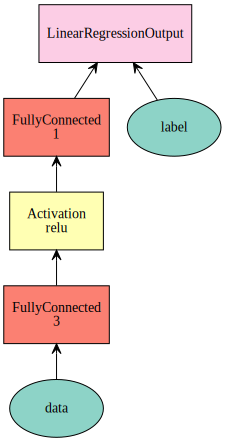

In [9]:
pred = model1.predict(test_iter)
print(mean_squared_error(y[flg_valid], pred))
mx.visualization.plot_network(net1, node_attrs={'fixedsize': 'false'})

#### 2. Custom function

In [10]:
loss = mx.sym.square(
    mx.sym.Reshape(fco, shape=(-1,)) - label
)
net2 = mx.sym.MakeLoss(loss)
model2 = mx.model.FeedForward(
    symbol=net2,
    num_epoch=15,
    learning_rate=0.1
)
model2.fit(
    X=train_iter,
    eval_data=valid_iter,
    eval_metric='MSE'
)

INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=0.011
INFO:root:Epoch[0] Validation-mse=123389273633193984.000000
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=0.007
INFO:root:Epoch[1] Validation-mse=3472040824668160.000000
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=0.007
INFO:root:Epoch[2] Validation-mse=97658467254272.000000
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=0.007
INFO:root:Epoch[3] Validation-mse=2744262066176.000000
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=0.006
INFO:root:Epoch[4] Validation-mse=76978479104.000000
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=0.007
INFO:root:Epoch[5] Validation-mse=2157003904.000000
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=0.007
INFO:root:Epoch[6] Validation-mse=61591550.000000
INFO:root:Epoch[7] Resetting Da

76.778488739


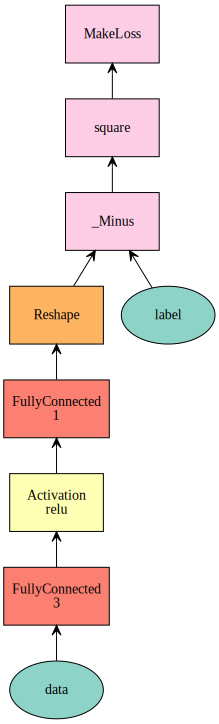

In [11]:
pred = np.sqrt(model2.predict(test_iter))
print(mean_squared_error(y[flg_valid], pred))
mx.visualization.plot_network(net2, node_attrs={'fixedsize': 'false'})

### Classification (Boston House Prices)

In [12]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = (boston.target >= boston.target.mean()).astype(np.int8)
print((x.shape, y.shape))

((506, 13), (506,))


In [13]:
flg_train = np.random.choice([False, True], len(y), replace=True, p=[0.3, 0.7])
flg_valid = np.logical_not(flg_train)

In [14]:
batch_size = 100
train_iter = mx.io.NDArrayIter(x[flg_train].values, y[flg_train],
                               batch_size, shuffle=True,
                               label_name='sm_label')
valid_iter = mx.io.NDArrayIter(x[flg_valid].values, y[flg_valid],
                               batch_size,
                               label_name='sm_label')
test_iter  = mx.io.NDArrayIter(x[flg_valid].values)

In [15]:
data  = mx.sym.Variable('data')
label = mx.sym.Variable('sm_label')
fc    = mx.sym.FullyConnected(data, num_hidden=3)
act   = mx.sym.Activation(fc, act_type='relu')
fco   = mx.sym.FullyConnected(act, num_hidden=2)
net1  = mx.sym.SoftmaxOutput(fco, name='sm')

#### 1. Build-in function

In [16]:
model1 = mx.model.FeedForward(
    symbol=net1,
    num_epoch=15,
    learning_rate=0.1
)
model1.fit(
    X=train_iter,
    eval_data=valid_iter,
    eval_metric='CE'
)

INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=0.007
INFO:root:Epoch[0] Validation-cross-entropy=0.694896
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=0.005
INFO:root:Epoch[1] Validation-cross-entropy=0.691014
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=0.006
INFO:root:Epoch[2] Validation-cross-entropy=0.688830
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=0.008
INFO:root:Epoch[3] Validation-cross-entropy=0.687697
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=0.007
INFO:root:Epoch[4] Validation-cross-entropy=0.687203
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=0.006
INFO:root:Epoch[5] Validation-cross-entropy=0.687085
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=0.005
INFO:root:Epoch[6] Validation-cross-entropy=0.687178
INFO:root:Epoch[7] Resetting Data Iterator
I

0.687112347189
0.5


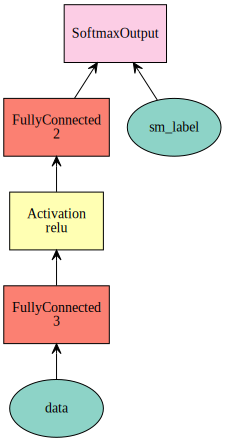

In [17]:
pred = model1.predict(test_iter)[:, 1]
print(log_loss(y[flg_valid], pred))
print(roc_auc_score(y[flg_valid], pred))
mx.visualization.plot_network(net1, node_attrs={'fixedsize': 'false'})

#### 2. Custom function

In [18]:
train_iter = mx.io.NDArrayIter(x[flg_train].values, y[flg_train],
                               batch_size, shuffle=True,
                               label_name='label')
valid_iter = mx.io.NDArrayIter(x[flg_valid].values, y[flg_valid],
                               batch_size,
                               label_name='label')
test_iter  = mx.io.NDArrayIter(x[flg_valid].values)

In [19]:
data  = mx.sym.Variable('data')
label = mx.sym.Variable('label')
fc    = mx.sym.FullyConnected(data, num_hidden=3)
act   = mx.sym.Activation(fc, act_type='relu')
fco   = mx.sym.FullyConnected(act, num_hidden=1)
p     = mx.sym.Activation(fco, act_type='sigmoid')
eps   = 1e-6
p     = mx.sym.minimum(mx.sym.maximum(p, eps), 1.0-eps)
q     = 1.0 - p
lp    = mx.sym.Reshape(mx.sym.log(p), shape=(-1,))
lq    = mx.sym.Reshape(mx.sym.log(q), shape=(-1,))
loss  = label * lp + (1.0 - label) * lq
net2  = mx.sym.MakeLoss(loss)

In [20]:
model2 = mx.model.FeedForward(
    symbol=net2,
    num_epoch=15,
    learning_rate=0.1
)
model2.fit(
    X=train_iter,
    eval_data=valid_iter,
    eval_metric='MAE'
)

INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=0.005
INFO:root:Epoch[0] Validation-mae=8.105288
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=0.005
INFO:root:Epoch[1] Validation-mae=8.105288
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=0.010
INFO:root:Epoch[2] Validation-mae=8.105288
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=0.008
INFO:root:Epoch[3] Validation-mae=8.105288
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=0.007
INFO:root:Epoch[4] Validation-mae=8.105288
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=0.007
INFO:root:Epoch[5] Validation-mae=8.105288
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=0.008
INFO:root:Epoch[6] Validation-mae=8.105288
INFO:root:Epoch[7] Resetting Data Iterator
INFO:root:Epoch[7] Time cost=0.007
INFO:root:Epoch[7] Validation-mae=8.

6.0696948799
0.5


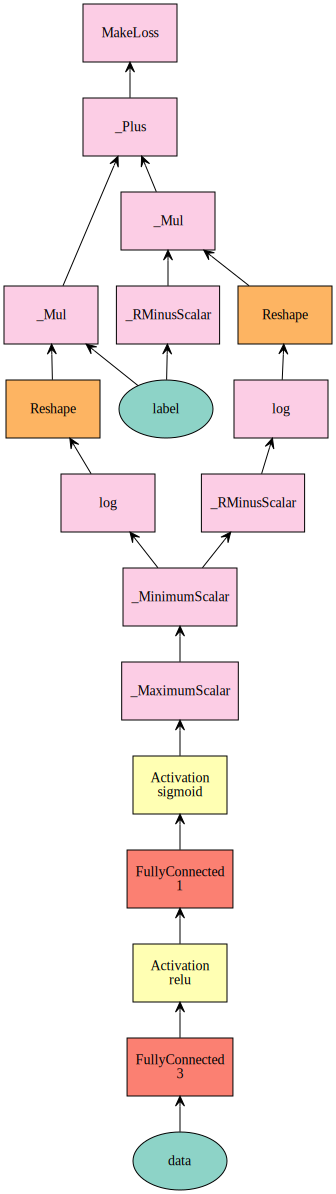

In [21]:
pred = np.exp(model2.predict(test_iter))
print(log_loss(y[flg_valid], pred))
print(roc_auc_score(y[flg_valid], pred))
mx.visualization.plot_network(net2, node_attrs={'fixedsize': 'false'})